In [1]:
from src.datasets import load_digit_dataset
from src.config import Config
from src.plotters import *

In [2]:
config = Config(
    img_size=32,
    img_c_in=1,
    img_c_out=1,
    batch_size=64,
    z_size=4,
    gamma_0=0.01,
    gamma_1=1.0,
    gamma_iters=500,
    T_iters=2,
    plot_interval=50,
    ckpt_interval=50,
    max_steps=2001
)

In [3]:
X_train_sampler, X_test_sampler = load_digit_dataset(
    batch_size=config.batch_size,
    img_size=config.img_size,
    name="MNIST",
    root="datasets"
)
Y_train_sampler, Y_test_sampler = load_digit_dataset(
    batch_size=config.batch_size,
    img_size=config.img_size,
    name="KMNIST",
    root="datasets"
)

In [4]:
import torch
import numpy as np

torch.manual_seed(0xBADBEEF); np.random.seed(0xBADBEEF)

In [5]:
X_fixed = X_train_sampler.sample(10)[:,None].repeat(1,4,1,1,1)
with torch.no_grad():
    Z_fixed = torch.randn(10, 4, config.zc, config.img_size, config.img_size, device='cpu') * config.z_std
    XZ_fixed = torch.cat([X_fixed, Z_fixed], dim=2)
del X_fixed, Z_fixed
Y_fixed = Y_train_sampler.sample(10)

X_test_fixed = X_test_sampler.sample(10)[:,None].repeat(1,4,1,1,1)
with torch.no_grad():
    Z_test_fixed = torch.randn(10, 4, config.zc, config.img_size, config.img_size, device='cpu') * config.z_std
    XZ_test_fixed = torch.cat([X_test_fixed, Z_test_fixed], dim=2)
del X_test_fixed, Z_test_fixed
Y_test_fixed = Y_test_sampler.sample(10)

In [6]:
from src.trainer import Trainer

trainer = trainer = Trainer(
    img_size=config.img_size,
    batch_size=config.batch_size,
    zc=config.zc,
    z_std=config.z_std,
    z_size=config.z_size,
    T_iters=config.T_iters,
    D_lr=config.D_lr,
    T_lr=config.T_lr,
    gamma_0=config.gamma_0,
    gamma_1=config.gamma_1,
    gamma_iters=config.gamma_iters,
    save_path="checkpoints",
    img_c_in=config.img_c_in,
    img_c_out=config.img_c_out,
    base_factor=config.base_factor,
    plot_interval=200,
    ckpt_interval=200,
    cost=config.cost,
    max_steps=config.max_steps
)

(<Figure size 2250x1350 with 60 Axes>,
 array([[<AxesSubplot: ylabel='X'>, <AxesSubplot: >, <AxesSubplot: >,
         <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
         <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
         <AxesSubplot: >],
        [<AxesSubplot: ylabel='T(X,Z)'>, <AxesSubplot: >, <AxesSubplot: >,
         <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
         <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
         <AxesSubplot: >],
        [<AxesSubplot: ylabel='T(X,Z)'>, <AxesSubplot: >, <AxesSubplot: >,
         <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
         <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
         <AxesSubplot: >],
        [<AxesSubplot: ylabel='T(X,Z)'>, <AxesSubplot: >, <AxesSubplot: >,
         <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
         <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
         <AxesSubplot: >],
        [<AxesSubplot: ylabel='T(X,Z)'>, <AxesSubplot: >, <AxesSubplot: >,
   

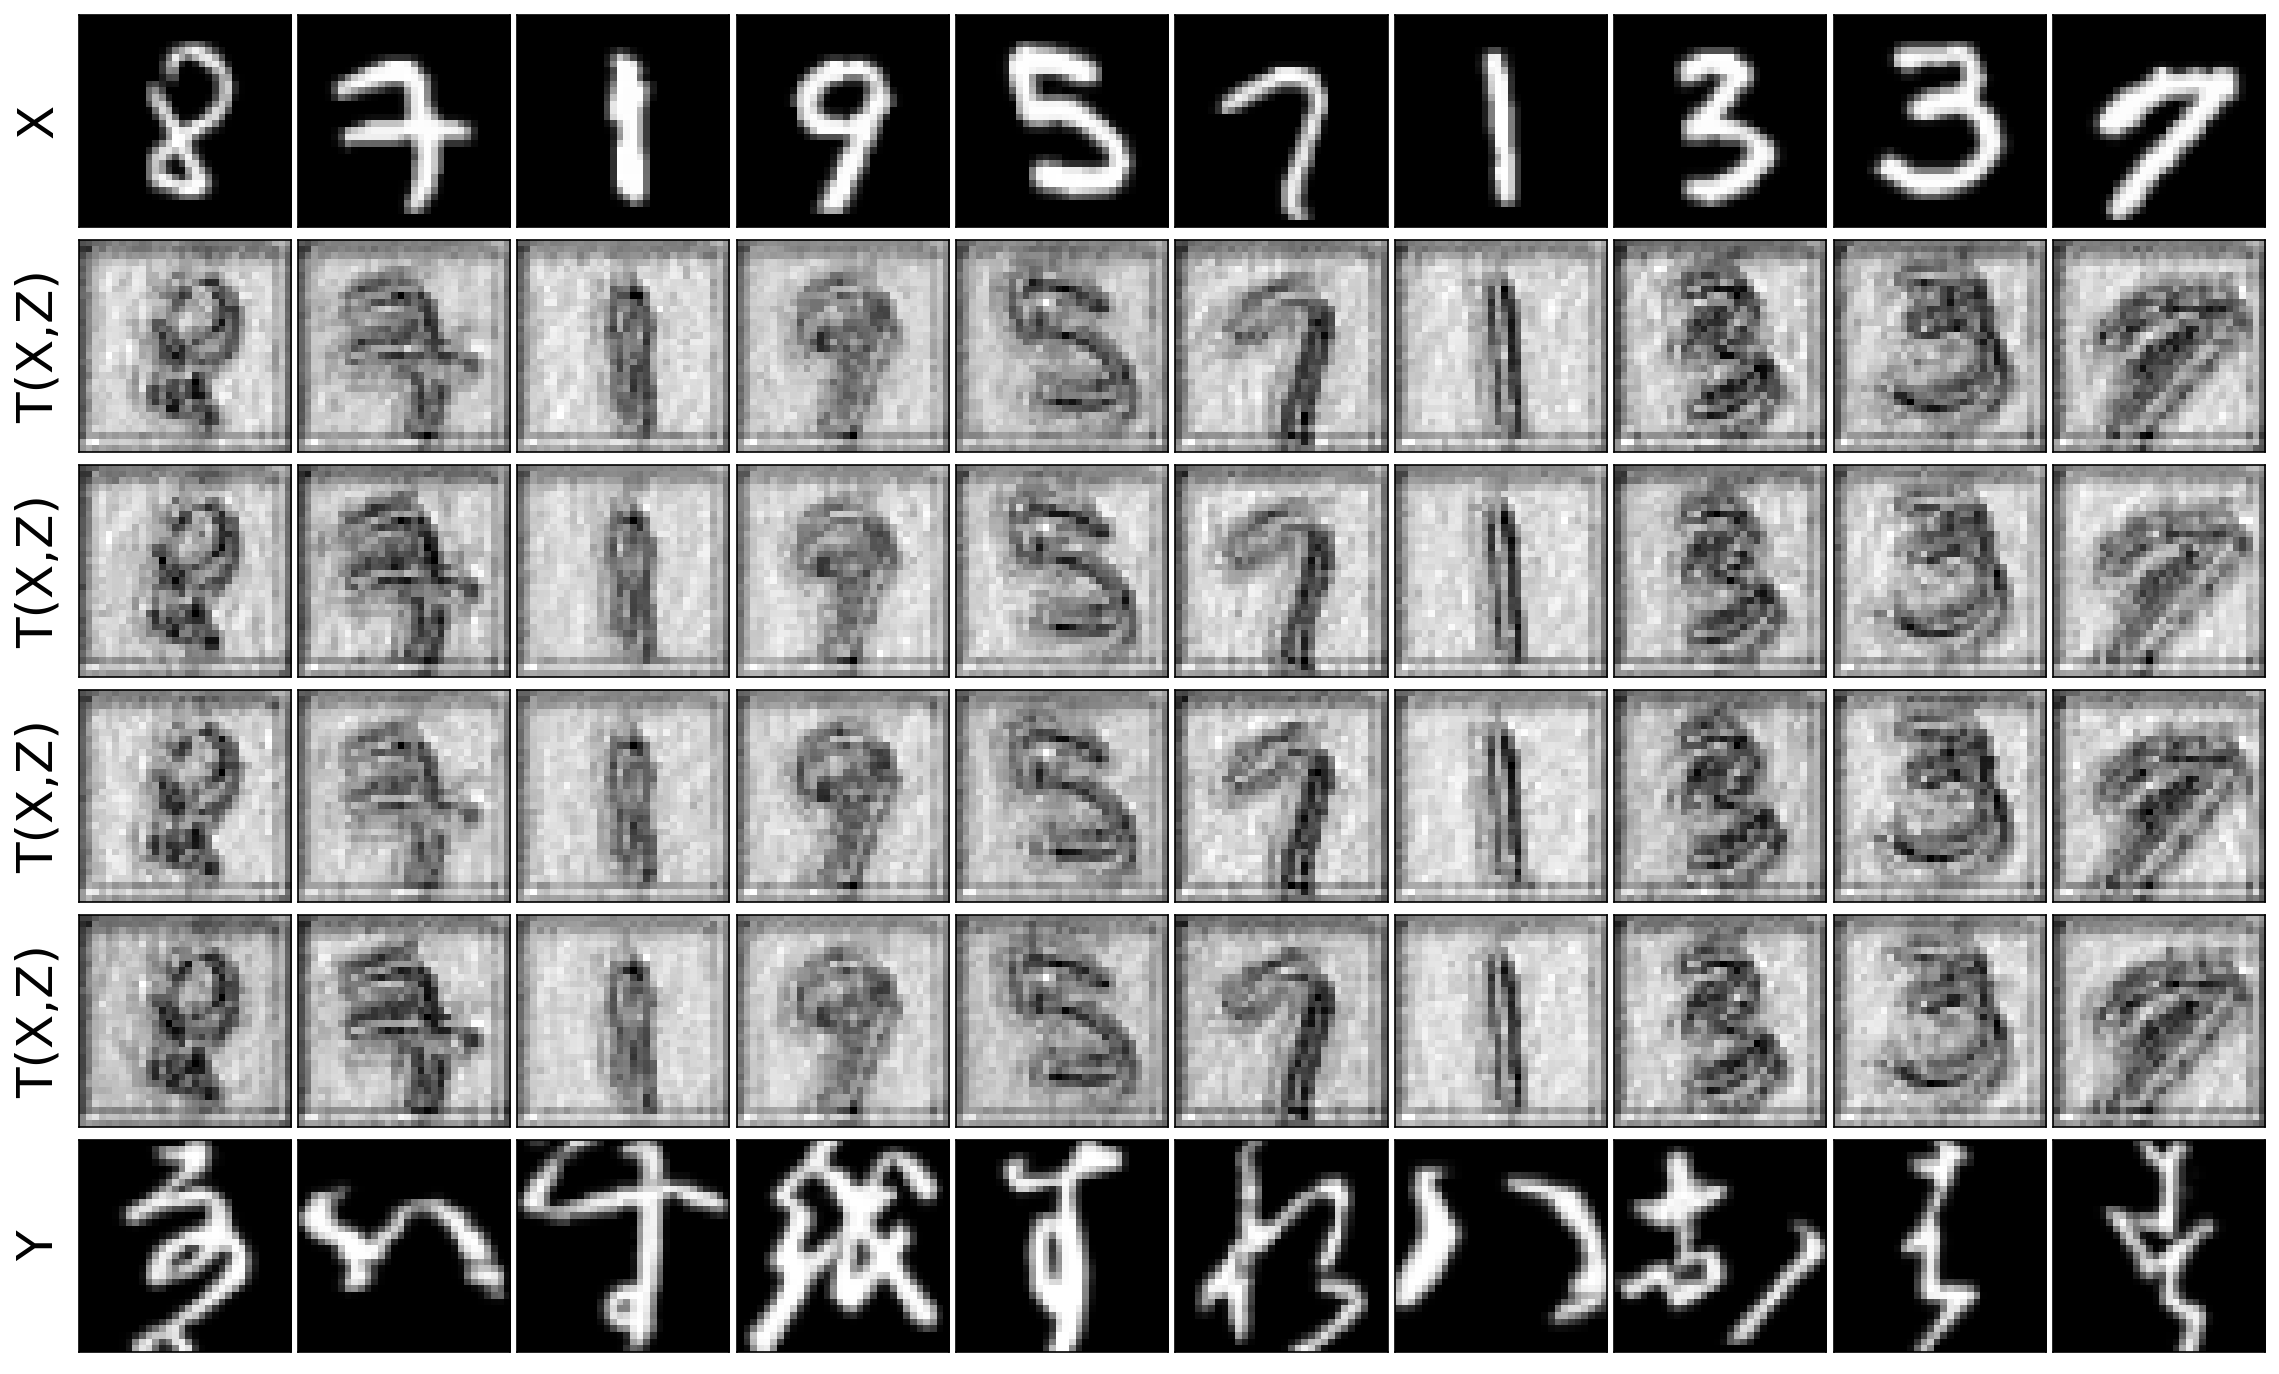

In [7]:
plot_Z_images(XZ_fixed, Y_fixed, trainer.T)

In [1]:
import torchvision.datasets as dataset

In [2]:
celeba = dataset.CelebA(
    root="datasets",
    target_type="attr"
)

In [5]:
celeba.attr.shape

torch.Size([162770, 40])

In [19]:
x, attr = celeba[400]

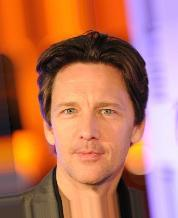

In [20]:
x

In [21]:
attr[20]

tensor(1)